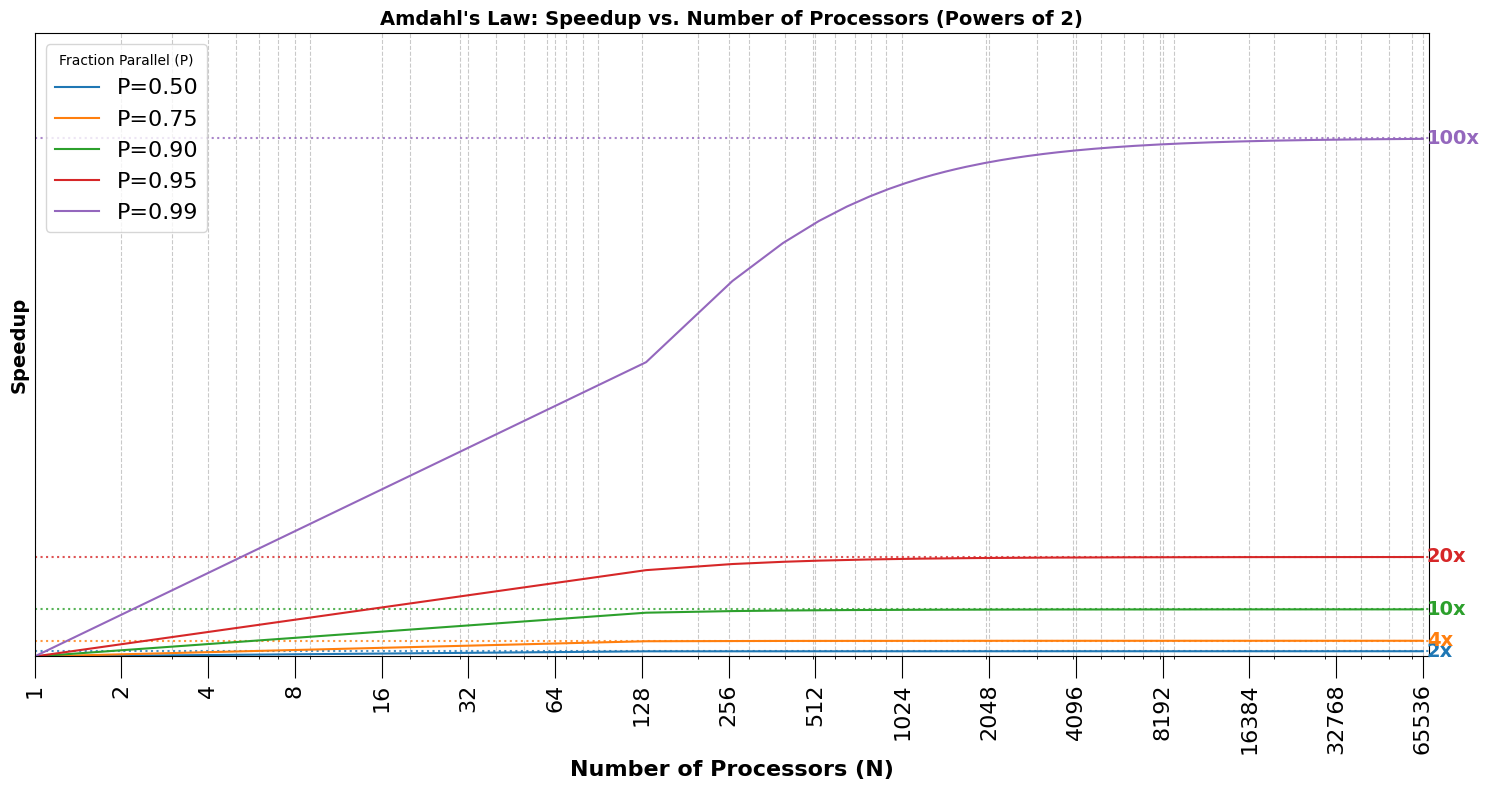

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Amdahl's Law function
def amdahls_speedup(P, N):
    """Calculates speedup according to Amdahl's Law."""
    N = np.asarray(N) 
    if P == 1:
        return N
    return 1 / ((1 - P) + (P / N))

# 2. Define the range for N (Number of Processors) as powers of two
power_of_two_exponents = np.arange(0, 17) # 0 to 16
N_values_discrete = 2**power_of_two_exponents

# For a smoother curve for plotting, use a dense range
N_values_dense = np.linspace(1, 65536, 500) 

# 3. Define the P values (Fraction of parallelizable code)
P_values = [0.5, 0.75, 0.90, 0.95, 0.99]

# 4. Create the plot
plt.figure(figsize=(15, 8)) # Slightly larger figure for readability

# Determine the x-position for the asymptote labels (slightly beyond the right edge of the plot)
# We'll extend the x-axis limits slightly to make space for these labels
max_N_for_plot = 65536
x_label_pos = max_N_for_plot * 1.03 # Place label 3% beyond the max N for better visibility

# Loop through each P value and plot the speedup curve
for P in P_values:
    # Use the dense N_values for plotting the smooth curve
    speedups_dense = amdahls_speedup(P, N_values_dense)
    
    # Calculate the theoretical maximum speedup for this P (as N -> infinity)
    max_speedup_theoretical = 1 / (1 - P)
    
    # Plot the main function line
    line, = plt.plot(N_values_dense, speedups_dense, label=f'P={P:.2f}') # Removed max speedup from legend

    # Plot the horizontal asymptote (max theoretical speedup)
    plt.axhline(y=max_speedup_theoretical, 
                color=line.get_color(),     
                linestyle=':',              
                alpha=0.8,                  
                linewidth=1.5)              
    
    # Add a text label for the asymptote
    plt.text(x_label_pos, max_speedup_theoretical, 
             f'{max_speedup_theoretical:.0f}x', # Format as integer with 'x' suffix
             color=line.get_color(), 
             ha='left', va='center', # Horizontal alignment: left, Vertical alignment: center
             fontsize=14, 
             fontweight='bold')


# 5. Customize the plot
plt.xscale('log') 

# Set custom x-axis ticks and labels
plt.xticks(N_values_discrete, [str(n) for n in N_values_discrete], fontsize=16)
plt.tick_params(axis='x', rotation=90, size=16) 

plt.xlabel('Number of Processors (N)', fontsize=16,fontweight='bold')

# >>> REMOVE ALL OTHER Y LABELS <<<
plt.ylabel('Speedup', fontsize=14,fontweight='bold')
plt.yticks([]) # Remove all y-axis ticks and their labels

plt.title("Amdahl's Law: Speedup vs. Number of Processors (Powers of 2)", fontsize=14, fontweight='bold')
plt.grid(True, which="both", ls="--", c='0.7', alpha=0.7) 
plt.legend(title='Fraction Parallel (P)', loc='upper left', fontsize=16)

plt.ylim(1, 120) 
plt.xlim(1, max_N_for_plot * 1.05) # Extend x-axis limits to ensure labels are visible

plt.tight_layout() 
plt.show()